Fri 19 JUL 2024

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


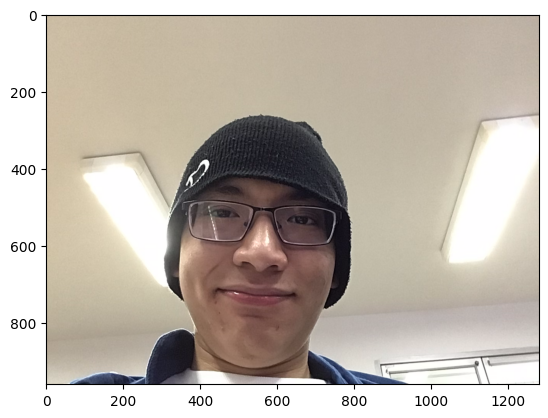

In [27]:
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Image Processing/Images/'
file_name = 'IMG_1725.png'
image = Image.open(f'{file_path}/{file_name}')

# Display the image
plt.imshow(image)
image.show()

See the loaded image's size and mode

In [28]:
#image = image.convert('RGBA')

In [29]:
print("Loaded Image:-")
print(f"Size: {image.size}")
print(f"Mode: {image.mode}")

Loaded Image:-
Size: (1280, 960)
Mode: RGB


Split color channels.

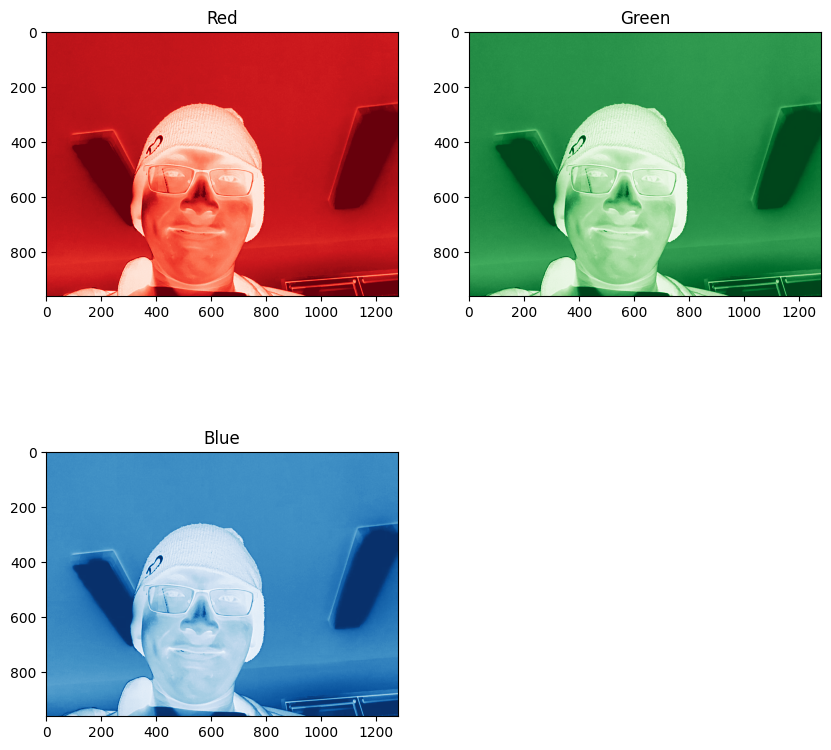

In [30]:
#img_r, img_g, img_b, img_a = image.split()
img_r, img_g, img_b = image.split()


plt.figure(figsize=(10, 10)) # (W, H) in inches
rows = 2; cols = 2; index = 1

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_r, cmap='Reds')
plt.title('Red')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_g, cmap='Greens')
plt.title('Green')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_b, cmap='Blues')
plt.title('Blue')

#plt.subplot(rows, cols, index); index += 1;
#plt.imshow(img_a, cmap='Greys')
#plt.title('Alpha')

plt.show()

In [31]:
print(len(set(list(img_g.getdata()))))

256


In [32]:
print(set(list([1, 1, 5, 5, 5, 3, 4])))

{1, 3, 4, 5}


Sampling and Quantization

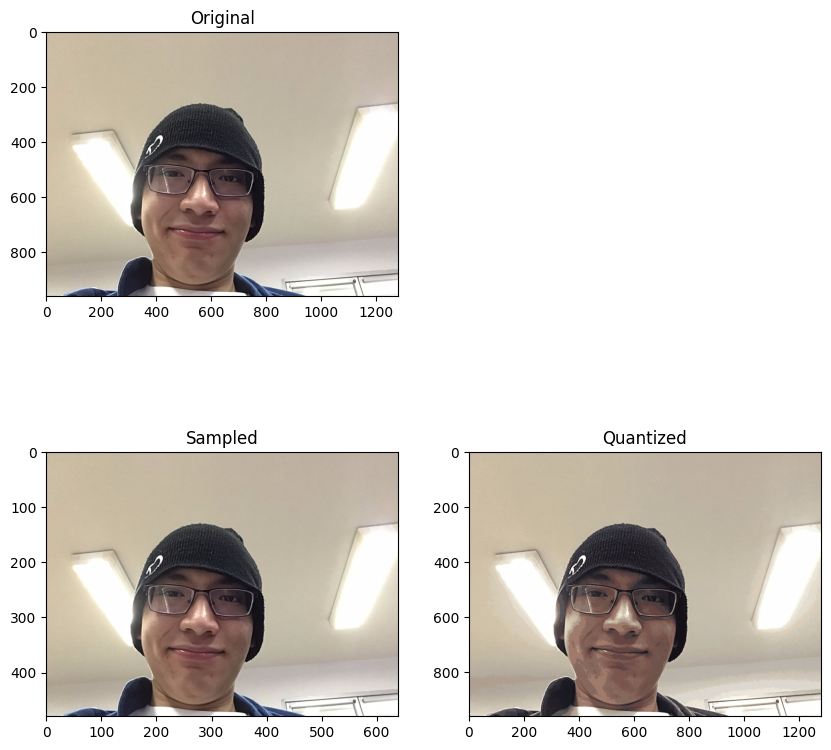

In [37]:
# Sample the image down to half its size
scale = 2
img_sampled = image.resize((image.width // scale, image.height // scale)) # '//' is the floor division operator.

# Quantize the image to num_colors' colors
num_colors = 64  # Ex. 64, 24, 8, 2
img_quantized = image.quantize(num_colors)

# Plot
img_r, img_g, img_b = image.split()

plt.figure(figsize=(10, 10)) # (W, H) in inches
rows = 2; cols = 2; index = 1

plt.subplot(rows, cols, index); index += 2;
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_sampled, cmap='gray')
plt.title('Sampled')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_quantized, cmap='gray')
plt.title('Quantized')

plt.show()

In [38]:
print('Sampled Image:-')
print(f'Size: {img_sampled.size}')
print(f'Mode: {img_sampled.mode}')

print('\nQuantized Image:-')
print(f'Size: {img_quantized.size}')
print(f'Mode: {img_quantized.mode}')

# img_quan_r, img_quan_g, img_quan_b, img_quan_b, img_quan_a = img_quantized.split()

# print(len(set(list(img_quan_r.getdata()))))

Sampled Image:-
Size: (640, 480)
Mode: RGB

Quantized Image:-
Size: (1280, 960)
Mode: P


Convert mode of the quantized image and check its unique colors

In [41]:
# Convert mode P to mode RGBA
img_quan_rgba = img_quantized.convert('RGBA')

# Split the channels.
img_quan_r, img_quan_g, img_quan_b, img_quan_a = img_quan_rgba.split()

# Check the unique colors.
print(f'Quantized Image ({num_colors} colors):-')
print(f'\nUnique RGBAs: {len(set(list(img_quan_rgba.getdata())))}')
print(f'\nUnique reds: {len(set(list(img_quan_r.getdata())))}')
print(f'Unique greens: {len(set(list(img_quan_g.getdata())))}')
print(f'Unique blues: {len(set(list(img_quan_b.getdata())))}')
print(f'Unique alphas: {len(set(list(img_quan_a.getdata())))}')

Quantized Image (64 colors):-

Unique RGBAs: 64

Unique reds: 45
Unique greens: 43
Unique blues: 44
Unique alphas: 1


# Complete the Assignment

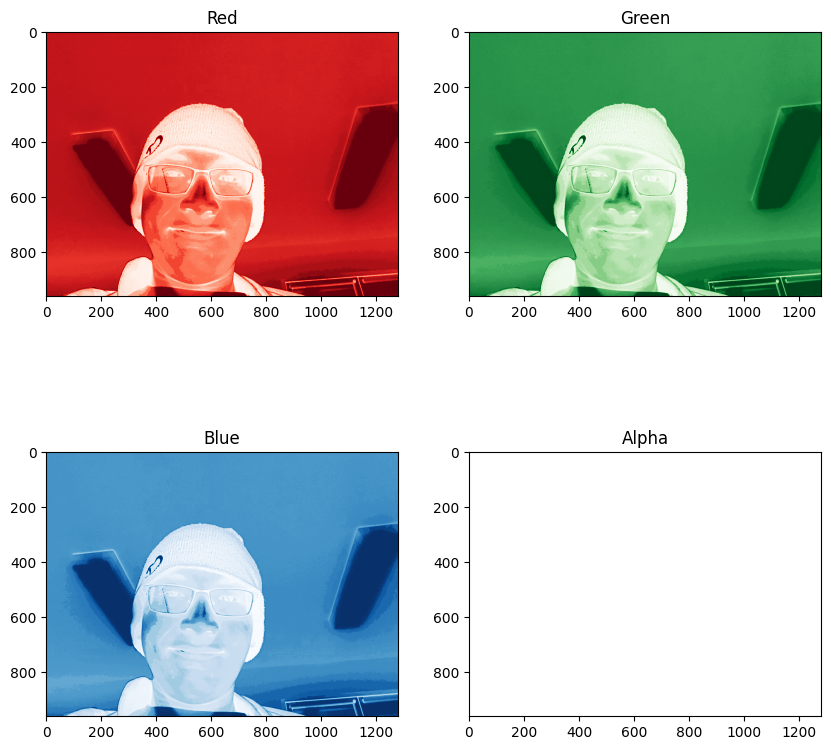

In [42]:
plt.figure(figsize=(10, 10)) # (W, H) in inches
rows = 2; cols = 2; index = 1

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_quan_r, cmap='Reds')
plt.title('Red')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_quan_g, cmap='Greens')
plt.title('Green')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_quan_b, cmap='Blues')
plt.title('Blue')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_quan_a, cmap='Greys')
plt.title('Alpha')

plt.show()

ตอนนี้เราจะเห็นว่าสีเริ่มเห็นเป็นขั้นบันไดแล้ว (ก่อนหน้านี้ ตอนที่ยังไม่ทำ Quantization มันจะดูเนียนตากว่า)

In [43]:
# img_quan_b.save(file_path + 'DemoCat_BlueQuan64.png') # As same as you use plt.imshow(img_quan_b, cmap = 'gray')
plt.imsave(file_path + '650510714_Red64.png', img_quan_r, cmap='Reds')

In [ ]:
# ID1_ID2_Red64.png ตัวอย่างชื่อไฟล์